# Mínimos Cuadrados

## Descomposición $QR$

In [1]:
import numpy as np
import scipy.linalg as spla
import matplotlib.pyplot as plt

In [2]:
def plotVector(A, Q):
    plt.figure(figsize=(6, 6))
    origin = [0], [0] # origin point
    plt.quiver(*origin, A[:,0], A[:,1], angles='xy', scale_units='xy', scale=1, color=['green', 'black'])
    plt.quiver(*origin, Q.T[:,0], Q.T[:,1], angles='xy', scale_units='xy', scale=1, color=['r', 'b'])
    plt.axis('square')
    plt.xlim([-2, 4])
    plt.ylim([-2, 4])
    plt.grid(True)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.show()

### Decomposición $QR$ reducida

In [3]:
def QR(A, modified=True):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))
    # Gram-Schmidt orthogonalization
    for j in range(n):
        y = A[:, j]
        for i in range(j):
            if modified:   
                R[i, j] = np.dot(Q[:, i], y)
            else:
                R[i, j] = np.dot(Q[:, i], A[:, j])
            y = y - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(y)
        Q[:, j] = y / R[j, j]
    return Q, R

### Ejemplo en $\mathbb{R}^2$

Para considerar el manejo de arreglos de ```numpy```, recordar que el procedimiento lo realizamos por vectores columnas, es decir,
\begin{equation}
    A=
    \left[
        \begin{array}{c|c}
            & \\ 
            \mathbf{a}_1 & \mathbf{a}_2 \\
            & \\
        \end{array}
    \right].
\end{equation}

In [5]:
A = np.array([[2., 1.], [1., 3.]])

In [6]:
A

array([[2., 1.],
       [1., 3.]])

#### Versión implementada

In [8]:
Q, R = QR(A)

In [9]:
np.dot(Q, R)

array([[2., 1.],
       [1., 3.]])

#### Versión ```numpy```

In [10]:
Q2, R2 = np.linalg.qr(A)

In [11]:
np.dot(Q2, R2)

array([[2., 1.],
       [1., 3.]])

In [15]:
print("Implementado")
print("Q:\n", Q)
print("R:\n", R)
print()
print("Numpy")
print("Q:\n", Q2)
print("R:\n", R2)

Implementado
Q:
 [[ 0.89442719 -0.4472136 ]
 [ 0.4472136   0.89442719]]
R:
 [[2.23606798 2.23606798]
 [0.         2.23606798]]

Numpy
Q:
 [[-0.89442719 -0.4472136 ]
 [-0.4472136   0.89442719]]
R:
 [[-2.23606798 -2.23606798]
 [ 0.          2.23606798]]


La implementación de ```numpy``` no realiza la consideración de $r_{j,j} > 0$.

### ¿Son ortogonales?

In [16]:
np.dot(Q[:,0], Q[:, 1]), np.dot(Q2[:,0], Q2[:, 1])

(0.0, -5.551115123125783e-17)

Al parecer sí :)

### ¿Se cumple $Q^{-1}=Q^*$?

In [17]:
np.linalg.inv(Q), Q.T

(array([[ 0.89442719,  0.4472136 ],
        [-0.4472136 ,  0.89442719]]),
 array([[ 0.89442719,  0.4472136 ],
        [-0.4472136 ,  0.89442719]]))

In [18]:
np.linalg.inv(Q2), Q2.T

(array([[-0.89442719, -0.4472136 ],
        [-0.4472136 ,  0.89442719]]),
 array([[-0.89442719, -0.4472136 ],
        [-0.4472136 ,  0.89442719]]))

Al parecer también.

### Visualmente

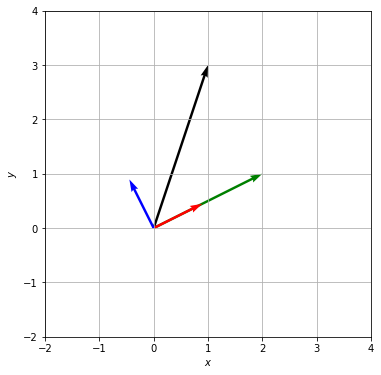

In [19]:
plotVector(A, Q)

Los vectores verde y negro corresponde a los vectores columnas de $A$. Los vectores rojo y azul corresponde a los vectores ortonormales encontrados por QR.

# Ajuste de curvas

## Resolución de mínimos cuadrados utilizando $QR$

In [20]:
def QRLS(A, b):
    Q, R = QR(A) # QR reduced
    x = spla.solve_triangular(R, np.dot(Q.T, b)) # Solve Rx=Q^*b
    return x

In [21]:
def plot(t, y, tt, yy, yyy):
    plt.figure(figsize=(12, 6))
    plt.plot(t, y, 'r.')
    plt.plot(tt, yy, label="Normal Equations")
    plt.plot(tt, yyy, label="QR")
    plt.grid(True)
    plt.legend()
    plt.xlabel(r'$t$')
    plt.ylabel(r'$y$')
    plt.show()

## Ecuaciones normales

In [22]:
lm = lambda c_1, c_2, t: c_1 + c_2 * t
qm = lambda c_1, c_2, c_3, t: c_1 + c_2 * t + c_3 * t ** 2
em = lambda c_1, c_2, t: c_1 * np.exp(c_2 * t)
sm = lambda c_1, c_2, c_3, c_4, t: c_1 + c_2 * np.cos(2 * np.pi * t) + c_3 * np.sin(2 * np.pi * t) + c_4 * np.cos(4 * np.pi * t)
pm = lambda c_1, c_2, t: c_1 * t ** c_2

In [23]:
# A^*A x = A^* b
def normalEquations(A, b):
    return np.linalg.solve(np.dot(A.T, A), np.dot(A.T, b))

#### Modelo lineal

In [24]:
lm = lambda c_1, c_2, t: c_1 + c_2 * t

In [25]:
n = 200
t_a, t_b = 0, 3
t = np.linspace(t_a, t_b, n)
tt = np.linspace(t_a, t_b, 3 * n)

In [26]:
y_l = lm(1, 2, t) + np.random.normal(1.5, .5, n) # Data
A_l = np.ones((n, 2))
A_l[:,1] = t
b_l = y_l

In [27]:
p_l = normalEquations(A_l, b_l)

In [28]:
p_l_qr = QRLS(A_l, b_l)

In [29]:
p_l, p_l_qr

(array([2.49202024, 1.97021668]), array([2.49202024, 1.97021668]))

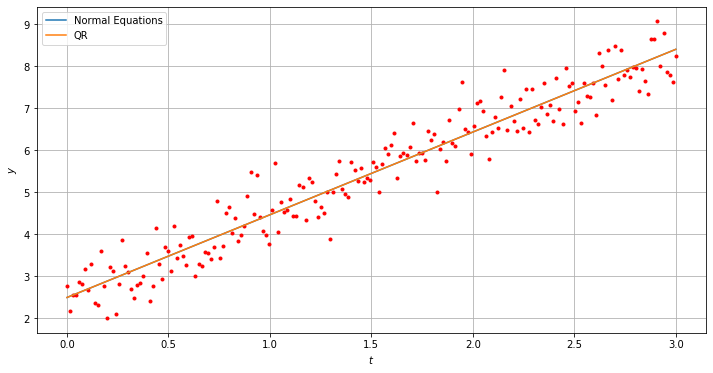

In [30]:
plot(t, y_l, tt, lm(*p_l, tt), lm(*p_l_qr, tt))

Podemos ver para ambos métodos obtenemos los mismos coeficientes del modelo lineal.

## Cuadrático

In [31]:
y_q = qm(1, 2, 3, t) + np.random.normal(5, 3, n)
A_q = np.ones((n, 3))
A_q[:, 1] = t
A_q[:, 2] = t ** 2
b_q = y_q

In [32]:
p_l = normalEquations(A_q, b_q)

In [33]:
p_l_qr = QRLS(A_q, b_q)

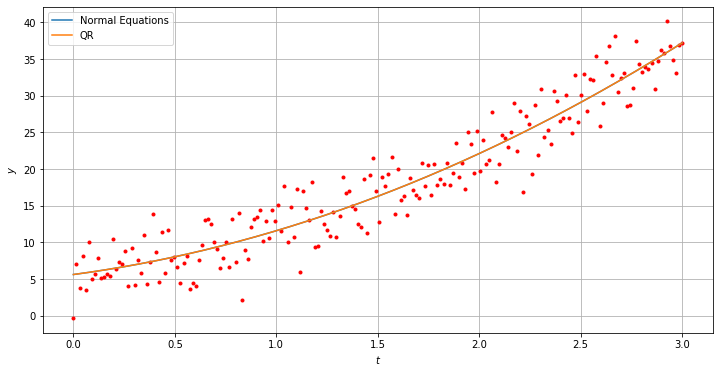

In [34]:
plot(t, y_q, tt, qm(*p_l, tt), qm(*p_l_qr, tt))

## Periódico

In [35]:
y_s = sm(1, 2, 2, 1, t) + np.random.normal(10, 2, n)
A_s = np.ones((n, 4))
A_s[:, 1] = np.cos(2 * np.pi * t)
A_s[:, 2] = np.sin(2 * np.pi * t)
A_s[:, 3] = np.cos(4 * np.pi * t)
b_s = y_s

In [36]:
p_l = normalEquations(A_s, b_s)

In [37]:
p_l_qr = QRLS(A_s, b_s)

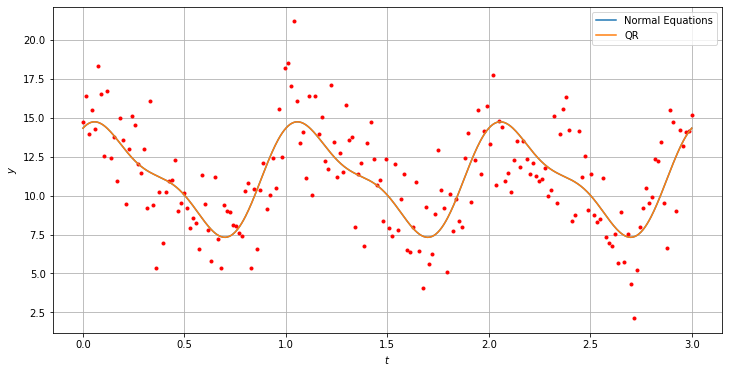

In [38]:
plot(t, y_s, tt, sm(*p_l, tt), sm(*p_l_qr, tt))

## Exponencial

In [39]:
y_e = em(1, 2, t) * np.random.normal(10, 2, n)
A_e = np.ones((n, 2))
A_e[:, 1] = t
b_e = np.log(y_e)

In [40]:
p_l = normalEquations(A_e, b_e)

In [41]:
p_l_qr = QRLS(A_e, b_e)

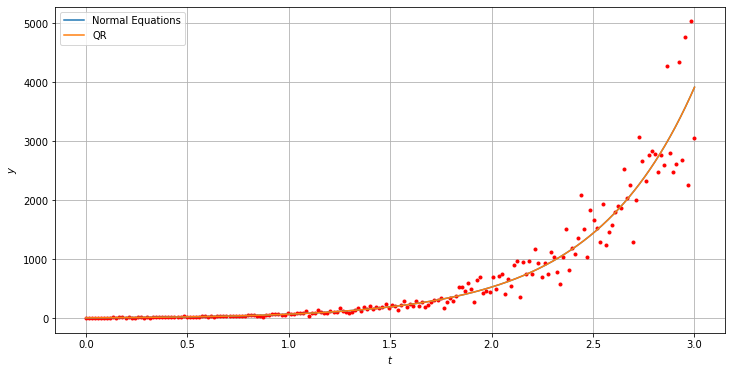

In [42]:
plot(t, y_e, tt,  em(np.exp(p_l[0]), p_l[1], tt),  em(np.exp(p_l_qr[0]), p_l_qr[1], tt))

## Comentarios

Podemos obtener los mismos resultados al utilizar **Ecuaciones Normales** que al usar la **Descomposición $QR$**. En teoría hay un método que requiere menos computación, ¿puede mostrarlo experimentalmente?